In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mydf=pd.read_csv('mydf_final.csv')

In [3]:
mydf

,sex,patient_type,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,icu,days,fatal
0,1,0,0.0,0.0,0.450000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.071429,0
1,0,0,0.0,1.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0
2,1,0,0.0,0.0,0.500000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1
3,0,0,0.0,1.0,0.391667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1
4,0,0,0.0,0.0,0.525000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.128571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114503,0,1,0.0,0.0,0.141667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.114286,0
114504,1,1,0.0,0.0,0.483333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
114505,1,0,0.0,1.0,0.733333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028571,1
114506,1,1,0.0,0.0,0.300000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042857,0


In [4]:
X = mydf.drop(columns = ['fatal'], axis = 1)
y = mydf.filter(['fatal'], axis = 1)
y.fatal = y.fatal.astype('category')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
y_train=y_train.squeeze()
y_train.squeeze()

99523     1
59139     0
2840      0
2223      1
81786     0
         ..
76820     0
110268    0
103694    1
860       0
15795     0
Name: fatal, Length: 80155, dtype: category
Categories (2, int64): [0, 1]

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, max_depth=3, random_state=0).fit(X_train, y_train)
predictionsGBT=clf.predict(X_test)
clf.score(X_test, y_test)

0.8127383343521672

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictionsGBTp = np.where(clf.predict_proba(X_test)[:,1] > 0.601619, 1, 0)
accuracyGBTp = accuracy_score(predictionsGBTp, y_test)
print(accuracyGBTp)
print(confusion_matrix(y_test, predictionsGBTp))

0.8065671120426163
[[26000   729]
 [ 5916  1708]]


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Threshold=0.282437, F-Score=0.598


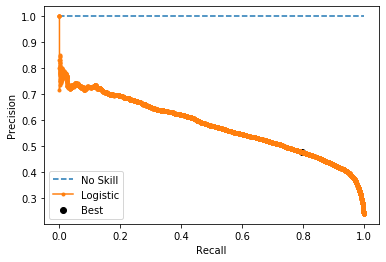

In [32]:
# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax
from sklearn.metrics import precision_recall_curve

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# fit a model
model=GradientBoostingClassifier(n_estimators=100, learning_rate=.1, max_depth=3, random_state=0)
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(trainX, trainy)
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(testy, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model

no_skill = len(testy[testy==1]) / len(testy)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [33]:
predictionsGBTp = np.where(clf.predict_proba(X_test)[:,1] > 0.28, 1, 0)
accuracyGBTp = accuracy_score(predictionsGBTp, y_test)
print(accuracyGBTp)
print(confusion_matrix(y_test, predictionsGBTp))

0.7698890926556633
[[20431  6298]
 [ 1607  6017]]


In [35]:
6017/(6017+1607)

0.789218258132214

In [36]:
20431/(20431+6298)

0.764375771633806

In [40]:
mydf['critical']=((mydf['intubed']==1) | (mydf.icu==1) | (mydf.fatal==1))

In [41]:
symptoms=mydf[['sex','pneumonia','age','diabetes','copd','inmsupr', 'hypertension','cardiovascular', 'obesity', 'renal_chronic',
       'tobacco']]
label1=mydf['critical']

gbt1=GradientBoostingClassifier(random_state=0)
gbt1.fit(symptoms, label1)

importance1 = gbt1.feature_importances_
def get_importance(list_symptoms, importance):
    sym_imp_map = [] 
    for sym, imp in zip(list_symptoms, importance):
        sym_imp_map.append((sym,imp))
    return sym_imp_map 

symptom_imp_map1 = get_importance(symptoms.columns, importance1)
print('\nFor death or ICU criticality, we have: \n')
sorted(symptom_imp_map1, reverse=True, key=lambda x: x[1])


For death or ICU criticality, we have: 



[('pneumonia', 0.7133035639518771),
 ('age', 0.23231166086258276),
 ('renal_chronic', 0.015389916500412475),
 ('diabetes', 0.013813849690345194),
 ('sex', 0.013639626399266766),
 ('obesity', 0.004254586765507865),
 ('hypertension', 0.00417264751258955),
 ('inmsupr', 0.0014773368861044794),
 ('copd', 0.0011306314337931466),
 ('cardiovascular', 0.0002676644641527557),
 ('tobacco', 0.00023851553336769118)]